# Aprendizaje automático (Machine Learning)

## K-Means (Clustering - algoritmo no supervisado)
Selecciona aleatoriamente los puntos, para realizar la segmentación de los grupos
La segmentación se hace hacía los más cercanos

In [1]:
import pandas as pd 

In [2]:
ruta = '../dataSet/csv/Mall_Customers-2.csv'

In [3]:
df = pd.read_csv(ruta, index_col=0)

In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
df.info() # indica que tipo de variables tenemos

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
# renombrar las columnas para que todo sea del mismo tipo
df.rename({'Gender': 'Genero', 'Age': 'Edad', 'Annual Income (k$)': 'Ingreso', 'Spending Score (1-100)': 'Gasto'}, axis=1, inplace=True)

In [7]:
df.head()

,Genero,Edad,Ingreso,Gasto
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## Análisis exploratorio

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Ingreso,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Gasto,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [9]:
df.Genero.value_counts()

Genero
Female    112
Male       88
Name: count, dtype: int64

### Segmentación tradicional

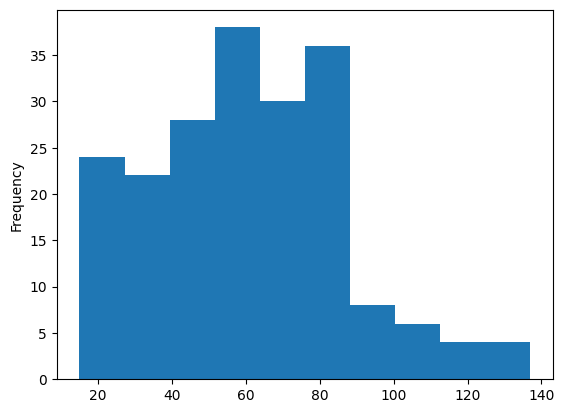

In [10]:
df.Ingreso.plot.hist();

In [11]:
import matplotlib.pyplot as plt, seaborn as sns
sns.set()

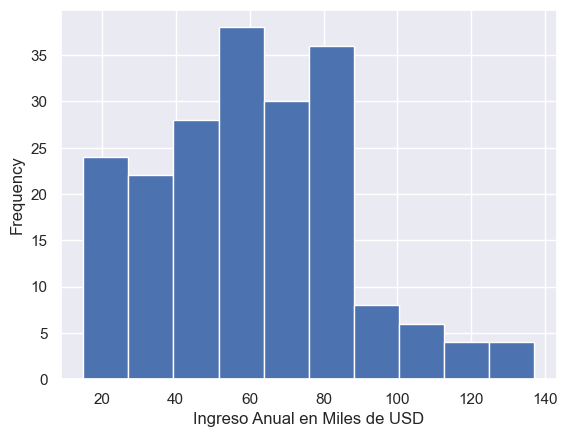

In [13]:
df.Ingreso.plot.hist()
plt.xlabel('Ingreso Anual en Miles de USD');

## Reglas a seguir

* Si ingreso < 50 entonces **Ingreso bajo**
* Si <= 50 ingreso <= 90 entonces **Ingreso moderado**
* Si ingreso > 90  **Ingreso alto'**

In [14]:
import numpy as np

In [15]:
df['Segmento'] = np.where(df.Ingreso >= 90, 'Ingreso Alto',
                          np.where(df.Ingreso < 50, 'Ingreso Bajo',
                                   'Ingreso moderado'))

In [16]:
df.Segmento.value_counts()

Segmento
Ingreso moderado    106
Ingreso Bajo         72
Ingreso Alto         22
Name: count, dtype: int64

In [19]:
df

,Genero,Edad,Ingreso,Gasto,Segmento
CustomerID,,,,,
1,Male,19,15,39,Ingreso Bajo
2,Male,21,15,81,Ingreso Bajo
3,Female,20,16,6,Ingreso Bajo
4,Female,23,16,77,Ingreso Bajo
5,Female,31,17,40,Ingreso Bajo
...,...,...,...,...,...
196,Female,35,120,79,Ingreso Alto
197,Female,45,126,28,Ingreso Alto
198,Male,32,126,74,Ingreso Alto


In [17]:
# analisis descriptivo en base al segmento 
df.groupby('Segmento')['Ingreso'].describe()

,count,mean,std,min,25%,50%,75%,max
Segmento,,,,,,,,
Ingreso Alto,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Ingreso Bajo,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Ingreso moderado,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


## Estandarizacion de datos

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
col_a_escalar = ['Edad', 'Ingreso', 'Gasto']
datos_a_escalar = df.copy()

In [ ]:
datos_a_escalar[col_a_escalar] = scaler.fit_transform(df[col_a_escalar]) # se entrena al modelo

In [24]:
datos_a_escalar

,Genero,Edad,Ingreso,Gasto,Segmento
CustomerID,,,,,
1,Male,-1.424569,-1.738999,-0.434801,Ingreso Bajo
2,Male,-1.281035,-1.738999,1.195704,Ingreso Bajo
3,Female,-1.352802,-1.700830,-1.715913,Ingreso Bajo
4,Female,-1.137502,-1.700830,1.040418,Ingreso Bajo
5,Female,-0.563369,-1.662660,-0.395980,Ingreso Bajo
...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,Ingreso Alto
197,Female,0.441365,2.497807,-0.861839,Ingreso Alto
198,Male,-0.491602,2.497807,0.923953,Ingreso Alto


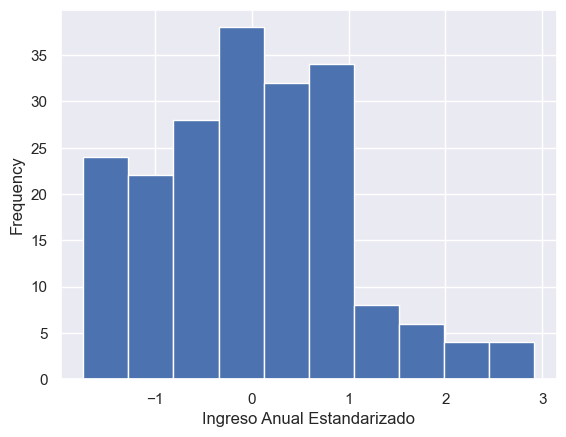

In [26]:
datos_a_escalar.Ingreso.plot.hist()
plt.xlabel('Ingreso Anual Estandarizado');

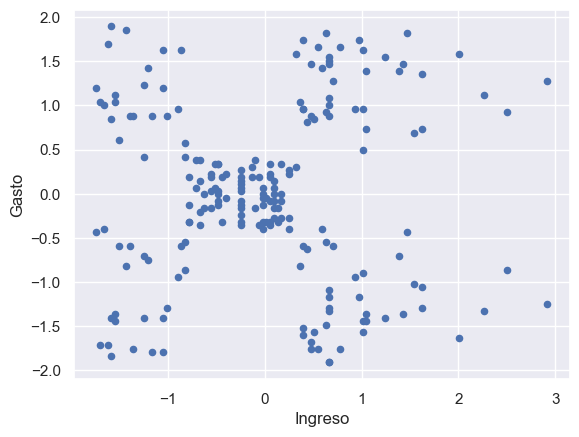

In [27]:
cluster_cols = ['Ingreso', 'Gasto']
datos_a_escalar.plot.scatter(x='Ingreso', y='Gasto');

## Uso K-Means

In [28]:
from sklearn.cluster import KMeans

In [29]:
modelo = KMeans(n_clusters=5, random_state=12)

In [32]:
modelo.fit(datos_a_escalar[cluster_cols])

KMeans(n_clusters=5, random_state=12)

In [34]:
# coloco el resultado de la predicion en la columna Segmento2
datos_a_escalar['Segmento2'] = modelo.predict(datos_a_escalar[cluster_cols])

In [35]:
datos_a_escalar.Segmento.value_counts()

Segmento
Ingreso moderado    106
Ingreso Bajo         72
Ingreso Alto         22
Name: count, dtype: int64

In [36]:
datos_a_escalar.Segmento2.value_counts()

Segmento2
1    81
3    39
2    35
0    23
4    22
Name: count, dtype: int64